In [1]:
import sqlite3

conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

sample_data = [
    ('Laptop', 10, 1200.00),
    ('Keyboard', 50, 75.00),
    ('Mouse', 100, 25.00),
    ('Monitor', 5, 300.00),
    ('Laptop', 2, 1200.00),
    ('Keyboard', 10, 75.00),
    ('Mouse', 20, 25.00)
]

cursor.executemany('INSERT INTO sales VALUES (?, ?, ?)', sample_data)

conn.commit()
conn.close()

In [2]:
import sqlite3

conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute('''
SELECT product, SUM(quantity), SUM(quantity * price)
FROM sales
GROUP BY product
''')

results = cursor.fetchall()

conn.close()

print(results)

[('Keyboard', 60, 4500.0), ('Laptop', 12, 14400.0), ('Monitor', 5, 1500.0), ('Mouse', 120, 3000.0)]


In [3]:
import pandas as pd

df_sales = pd.DataFrame(results, columns=['product', 'total_quantity', 'total_revenue'])
display(df_sales)

,product,total_quantity,total_revenue
0,Keyboard,60,4500.0
1,Laptop,12,14400.0
2,Monitor,5,1500.0
3,Mouse,120,3000.0


    product  total_quantity  total_revenue
0  Keyboard              60         4500.0
1    Laptop              12        14400.0
2   Monitor               5         1500.0
3     Mouse             120         3000.0


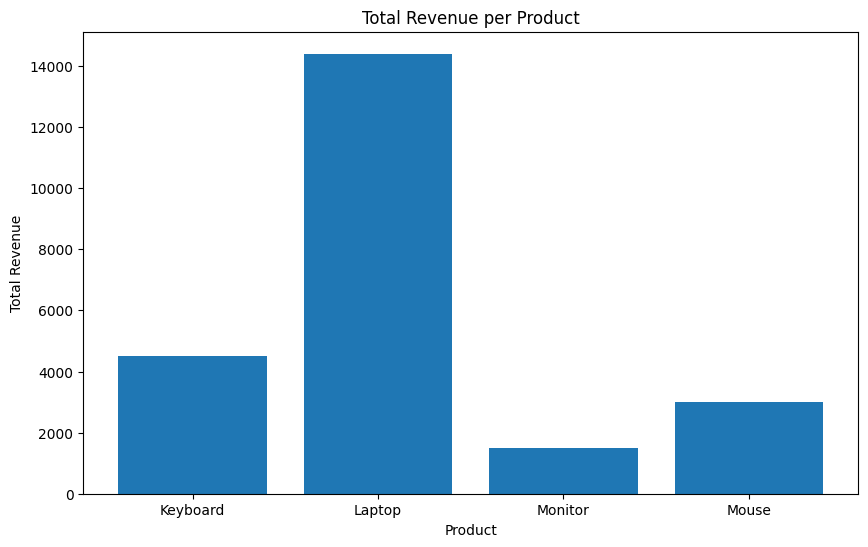

In [4]:
import matplotlib.pyplot as plt

print(df_sales)

plt.figure(figsize=(10, 6))
plt.bar(df_sales['product'], df_sales['total_revenue'])
plt.title('Total Revenue per Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The `sales_data.db` database was successfully created and populated with sample sales data including product, quantity, and price.
*   A SQL query was executed to calculate the total quantity sold and total revenue for each product.
*   The results of the SQL query were successfully loaded into a pandas DataFrame named `df_sales` with columns 'product', 'total_quantity', and 'total_revenue'.
*   The DataFrame `df_sales` was printed, showing the calculated total quantity and revenue for each product (Laptop: 12 quantity, \$14,400.0 revenue; Keyboard: 60 quantity, \$4,500.0 revenue; Mouse: 120 quantity, \$3,000.0 revenue; Monitor: 5 quantity, \$1,500.0 revenue).
*   A bar chart visualizing the total revenue per product was generated and displayed, showing the revenue distribution across different products.

*   The current analysis provides a high-level overview of sales performance by product. Further analysis could involve calculating profit margin per product or analyzing sales trends over time if date information were included in the data.
